In [1]:
from FireGrid import *
import matplotlib
from matplotlib import pyplot as plt

from IPython.display import display
from IPython.display import HTML
import inspect

from math import *
%matplotlib inline
from matplotlib import animation
matplotlib.rc('animation', html='html5')
goldenratio=1/2*(1+sqrt(5))
fsx=7
fsy=fsx/goldenratio

import random

def InfoDocString(function):
    """Function to return function definition and document string."""
    
    code = inspect.getsource(function)
    docstring = inspect.getdoc(function)
    return code[0:code.find(':')+1].lstrip() +'\n' + docstring

In [12]:
MyDtype = numpy.dtype([('Value', 'f', (3,)), ('State', 'i')])

In [32]:
def uf():
    MyGrid.Update()
    MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
    #MyAxes.imshow(MyGrid['Value'])
    MyFigure

In [14]:
def af(n):
    uf()

In [15]:
def init(grid, rows, columns, probtree, probburning):
    for y in range(rows):
        for x in range(columns):
            if random.random() < probtree:
                MyGrid['State'][y][x]    = 1
                if random.random() < probburning:
                    MyGrid['State'][y][x] = 2
            else:
                MyGrid['State'][y][x]    = 0
    grid.SetValue()
    grid.SetBoundary()

In [16]:
def FireGridCopy(OldGrid):
    New = FireGrid(OldGrid.shape, OldGrid.dtype)
    numpy.copyto(New,OldGrid)
    New.SetValue()
    New.SetBoundary()
    return New

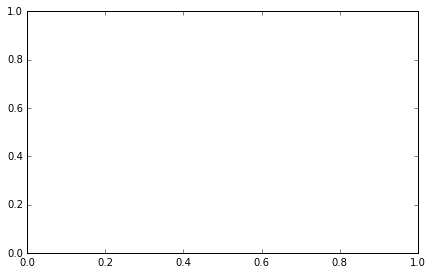

In [17]:
MyFigure, MyAxes = plt.subplots(1,1,figsize=(fsx,fsy))

In [18]:
from pathlib import Path
Path('TimingFile.txt').touch()
tf=0

The State grid is:
[[1 0 1]
 [1 2 1]
 [1 0 1]]


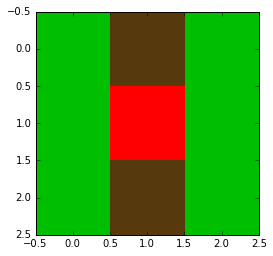

In [33]:
rows = 3
columns = 3
MyGrid=FireGrid((rows,columns),MyDtype)
init(MyGrid,rows,columns,0.80,0.25)
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
print('The State grid is:')
print(MyGrid['State'])
MyFigure

The State grid is:
[[2 0 2]
 [2 0 2]
 [2 0 2]]


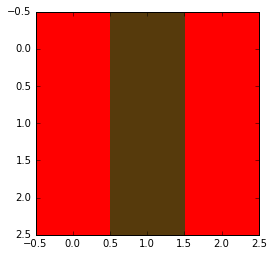

In [34]:
MyGrid.Update()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
print('The State grid is:')
print(MyGrid['State'])
MyFigure

The State grid is:
[[0 0 0]
 [0 0 0]
 [0 0 0]]


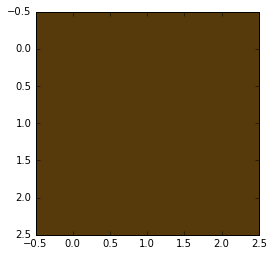

In [35]:
MyGrid.Update()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')
print('The State grid is:')
print(MyGrid['State'])
MyFigure

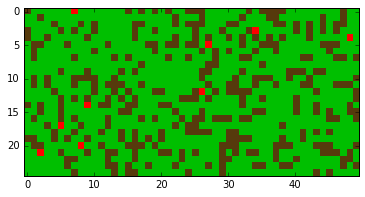

In [36]:
rows = 25
columns = 50
MyGrid=FireGrid((rows,columns),MyDtype)  #initilized with whatever random memory was at the location.
init(MyGrid,rows,columns,probtree=0.75, probburning=0.01)
SmallGrid01=FireGridCopy(MyGrid)
MyFigure, MyAxes = plt.subplots()
MyAxes.imshow(MyGrid['Value'],interpolation='nearest')

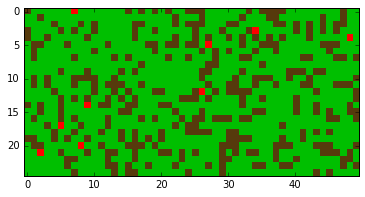

In [37]:
MyAxes.imshow(SmallGrid01['Value'],interpolation='nearest')
MyFigure

In [38]:
AnimationFrames = 50  #total number of frames in animation.
DelayBetweenFrames = 50 #in msec (20 gives 50 fps) (33.3 gives 30 fps)
AnimationTime = AnimationFrames * DelayBetweenFrames/1000
print ("The animation will be {:.1f} seconds long.".format(AnimationTime))

The animation will be 2.5 seconds long.


In [39]:
tf+=1
Path('TimingFile{:0>2}.txt'.format(tf)).touch()
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation

<video controls autoplay loop src="FireSim_Small_Grid_libx264.mp4" />

In [ ]:
MyGrid = FireGridCopy(SmallGrid01)
tf+=1
Path('TimingFile{:0>2}.txt'.format(tf)).touch()
MyAnimation = animation.FuncAnimation(MyFigure, af,
                               frames=AnimationFrames, interval=DelayBetweenFrames, blit=False)
MyAnimation.save('FireSim_Small_Grid_h264.mp4',extra_args=['-vcodec', 'h264'])